In [1]:
import numpy as np#you usually need numpy

#---these are for plots---#
import matplotlib
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.size']=16
plt.rcParams['font.family']='dejavu sans'

plt.rcParams['mathtext.fontset']='stix'
plt.rcParams['mathtext.rm']='custom'
plt.rcParams['mathtext.it']='stix:italic'
plt.rcParams['mathtext.bf']='stix:bold'
#-------------------------#

In [2]:
#load the module
from sys import path as sysPath
from os import path as osPath
sysPath.append(osPath.join(osPath.dirname('./'), '../../src'))

from interfacePy.Axion import Axion 
from interfacePy.Cosmo import Hubble,rho_crit,h_hub
from interfacePy.FT import FT #easy tick formatting


In [3]:
theta_i, fa=0.1, 1e16

umax=500
TSTOP=1e-4
ratio_ini=1e3

N_convergence_max, convergence_lim=15, 1e-2 #this is fine, but you can experiment a bit. 

#radiation dominated example
inputFile="../../UserSpace/InputExamples/MatterInput.dat" 

In [4]:
# options for the solver
# These variables are optional. Yoou can use the Axion class without them.
minimum_step_size=1e-8; #This limits the sepsize to an upper limit. 
initial_step_size=1e-2; #initial step the solver takes. 
beta=0.8; #controls how agreesive the adaptation is. Generally, it should be around but less than 1.

#The stepsize does not increase more than fac_max, and less than fac_min. 
#This ensures a better stability. Ideally, fac_max=inf and fac_min=0, but in reality one must 
#tweak them in order to avoid instabilities.
fac_max=1.05; 
fac_min=0.9;
maximum_No_steps=int(1e7); #maximum steps the solver can take Quits if this number is reached even if integration is not finished.


ax=[]
dt=[]
for _max,_tol in [[1e-1,1e-6],
                       [1e-1,1e-11],
                       [1e-3,1e-6],
                       [1e-3,1e-11]]:
    maximum_step_size=_max; #This limits the sepsize to a lower limit.
    absolute_tolerance=_tol; #absolute tolerance of the RK solver
    relative_tolerance=_tol; #relative tolerance of the RK solver


    # Axion instance
    ax.append(Axion(theta_i, fa, umax, TSTOP, ratio_ini, N_convergence_max, convergence_lim, inputFile,
            initial_step_size,minimum_step_size, maximum_step_size, absolute_tolerance, 
            relative_tolerance, beta, fac_max, fac_min, maximum_No_steps))

    dt.append(ax[-1].solveAxion())



In [5]:
for _ax in ax:
    print(_ax.relic,
          (_ax.relic-ax[-1].relic)/ax[-1].relic*100
         )
    

0.10450782393338787 -15.620376264198052
0.12347155991753667 -0.30905461628503783
0.12364022803644364 -0.17287196627916124
0.12385433746494132 0.0


In [6]:
for _ax in ax:
    _ax.getPeaks()#this gives you the peaks of the oscillation
    _ax.getPoints()#this gives you all the points of integration
    _ax.getErrors()#this gives you local errors of integration

<IPython.core.display.Javascript object>


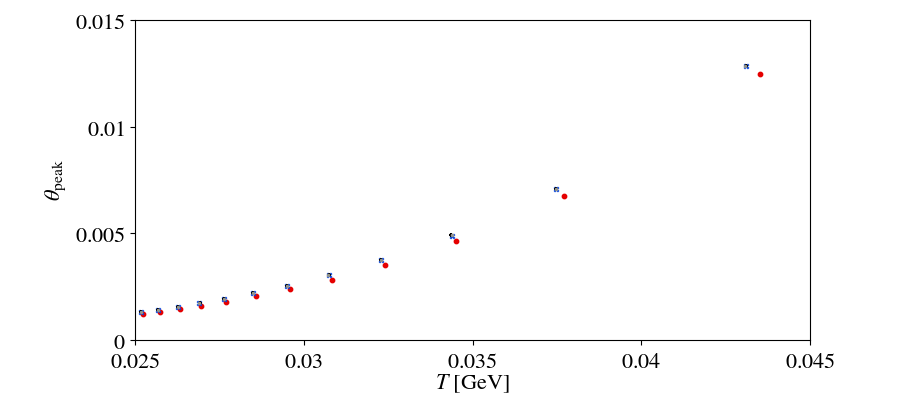

In [7]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.95, right=0.9,wspace=0.0,hspace=0.0)
    sub = fig.add_subplot(1,1,1)
    
    colors=iter(['xkcd:red','xkcd:blue','xkcd:black','xkcd:gray'])
    lines=iter([':','-','-.','--'])
    markers=iter(reversed(['.','+','x','o']))
    
    for _ax in ax:
        sub.scatter(_ax.T_peak,_ax.theta_peak,marker=next(markers),color=next(colors),s=10)

    
    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'$\theta_{\rm peak}$')
    sub.yaxis.set_label_coords(-0.1,0.5) 

    
    #set major ticks
    _M_xticks=[ round(0.02+i*0.005,4) for i in range(0,15) ]
    _M_yticks=[ round(-0.02+i*0.005,3) for i in range(0,10)  ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0.025,xmax=0.045,ymin=-0.0,ymax=0.015,xscale='linear',yscale='linear')

    ft.format_ticks(plt,sub)    

    
    
#     fig.savefig('theta_evolution.pdf',bbox_inches='tight')

    fig.show()

<IPython.core.display.Javascript object>


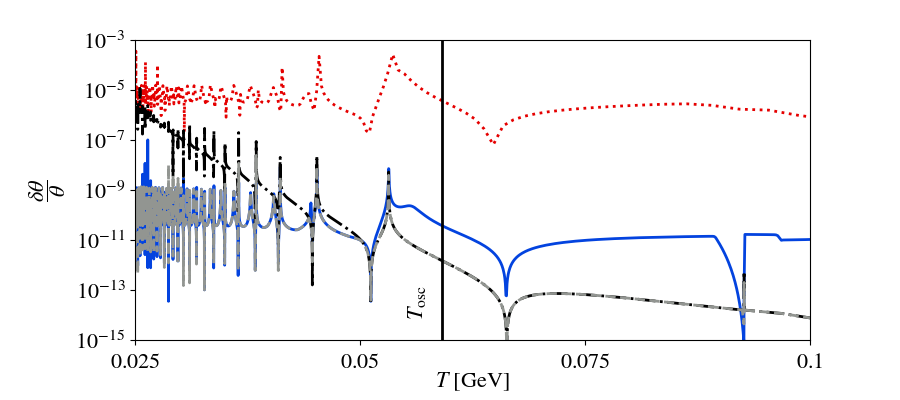

In [8]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    colors=iter(['xkcd:red','xkcd:blue','xkcd:black','xkcd:gray'])
    lines=iter([':','-','-.','--'])
    
    for _ax in ax:
        sub.plot(_ax.T,np.abs(_ax.dtheta/_ax.theta),linestyle=next(lines),linewidth=2,alpha=1,c=next(colors))
    
    sub.set_yscale('log')
    sub.set_xscale('linear')
    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'$\dfrac{\delta \theta}{\theta}$')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    
    
    
    
#     for _ax in ax:
#         sub.axvline(_ax.T_osc,linestyle='--',color='xkcd:gray',linewidth=1.5)
    sub.axvline(ax[-1].T_osc,linestyle='-',color='xkcd:black',linewidth=2)
    
    
    #set major ticks
    _M_xticks=[ round(0.025+i*0.025,4) for i in range(0,15) ]
    _M_yticks=[ 10.**i for i in range(-15,-1,2)  ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0.025,xmax=0.1,ymin=1e-15,ymax=1e-3,xscale='linear',yscale='log')

    ft.format_ticks(plt,sub)    

    
    sub.text(x=0.055,y=1e-14, s=r'$T_{\rm osc}$',rotation=90)
    
#     fig.savefig('local_errors.pdf',bbox_inches='tight')

    
    fig.show()


<IPython.core.display.Javascript object>


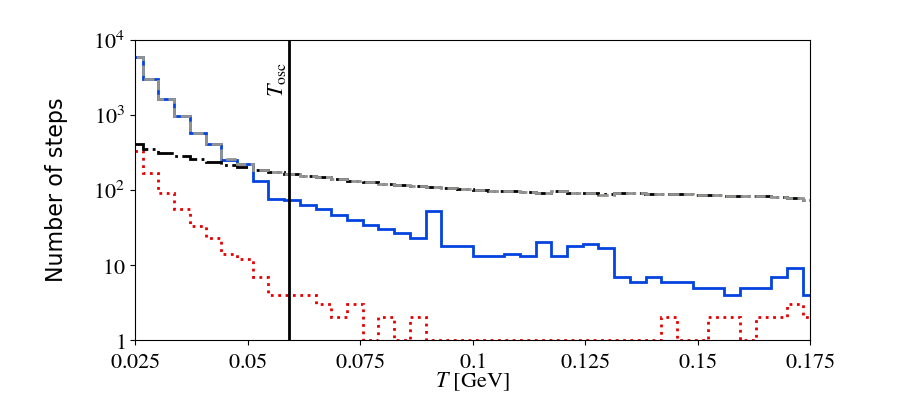

In [9]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)

    colors=iter(['xkcd:red','xkcd:blue','xkcd:black','xkcd:gray'])
    lines=iter([':','-','-.','--'])
    
    for _ax in ax:
        sub.hist(_ax.T,bins=50,histtype='step',linewidth=2,alpha=1,color=next(colors),ls=next(lines))
    
    sub.set_yscale('log')
    sub.set_xscale('linear')
    
    sub.set_xlabel(r'$T ~[{\rm GeV}]$')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'Number of steps')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    


    sub.axvline(ax[-1].T_osc,linestyle='-',color='xkcd:black',linewidth=2)
    
    
    #set major ticks
    _M_xticks=[ round(0.025+i*0.025,4) for i in range(0,15) ]
    _M_yticks=[ 10.**i for i in range(-12,5,1)  ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=0.025,xmax=0.175,ymin=1e0,ymax=1e4,xscale='linear',yscale='log')

    ft.format_ticks(plt,sub)    

    
    sub.text(x=0.054,y=2e3, s=r'$T_{\rm osc}$',rotation=90)

#     fig.savefig('histogram.pdf',bbox_inches='tight')

    fig.show()


<IPython.core.display.Javascript object>


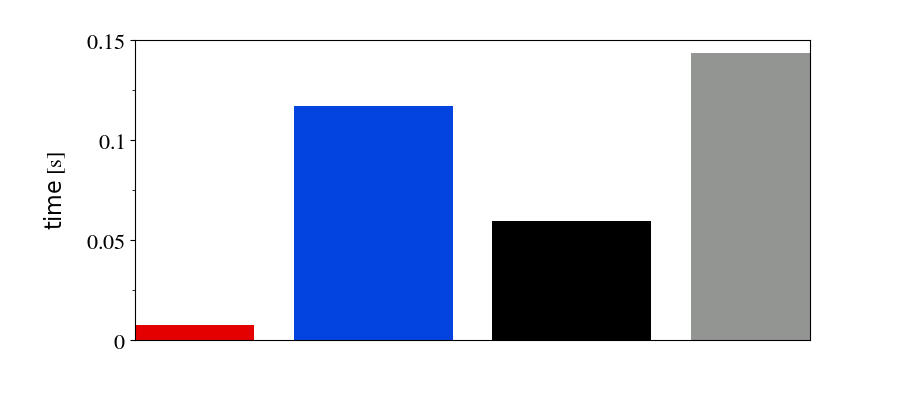

In [10]:
if True:
    fig=plt.figure(figsize=(9,4))
    fig.subplots_adjust(bottom=0.15, left=0.15, top = 0.9, right=0.9,wspace=0.0,hspace=0.25)
    sub = fig.add_subplot(1,1,1)
    
    colors=iter(['xkcd:red','xkcd:blue','xkcd:black','xkcd:gray'])
    lines=iter([':','-','-.','--'])
    
    for i,_ in enumerate(dt):
        sub.bar(i,_,color=next(colors))
    
    
    sub.set_xlabel(r'')
    sub.xaxis.set_label_coords(0.5, -0.1) 
    sub.set_ylabel(r'time$~[{\rm s}]$')
    sub.yaxis.set_label_coords(-0.1,0.5) 
    
    
    
    
    #set major ticks
    _M_xticks=[]
    _M_yticks=[ round(0.0 + i*0.05,3) for i in range(0,5)  ]

    #set major ticks that will not have a label
    _M_xticks_exception=[]
    _M_yticks_exception=[]

    _m_xticks=[]
    _m_yticks=[i*0.025 for i in range(1,10)  ]  
    ft=FT(_M_xticks,_M_yticks,
                 _M_xticks_exception,_M_yticks_exception,
                 _m_xticks,_m_yticks,
                 xmin=-0.2,xmax=3.2,ymin=0,ymax=0.15,xscale='linear',yscale='linear')

    ft.format_ticks(plt,sub)    

    
    
#     fig.savefig('dt.pdf',bbox_inches='tight')

    
    fig.show()


In [11]:
#run the destructor
del ax